# Linear Regression

**Steps Involved:**

    1. Give random value to theta
    2. Measure how good theta is - loss function
    3. Update theta - Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1 - Data Loading and Visualisation

In [2]:
x=pd.read_csv("./Training data/Linear_X_Train.csv")

In [3]:
y=pd.read_csv("./Training data/Linear_Y_Train.csv")

In [4]:
x.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [6]:
x.shape

(3750, 1)

In [7]:
y.shape

(3750, 1)

In [8]:
plt.style.use("seaborn")

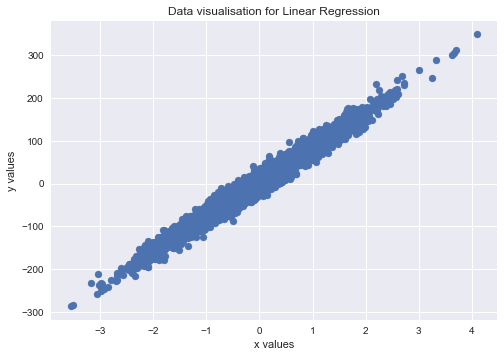

In [9]:
plt.scatter(x,y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title("Data visualisation for Linear Regression")
plt.show()

In [10]:
#convert x and y into numpy arrays
x=x.values
y=y.values

In [11]:
print("x data:\n",x,'\n\n',"y data:\n",y)

x data:
 [[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]] 

 y data:
 [[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


# Step 2 : Implement Linear Regression

In [12]:
#computes the y_hat (prediction) => y_hat = x*theta(1)+theta(0)
def hypothesis(cur_x,theta):
    #theta here => [theta0,theta1]
    yhat = theta[0] + theta[1]*cur_x
    return yhat

In [13]:
#computes gradient
def gradient(x_data,y_data,theta):
    n=x_data.shape[0]  #total no of values
    grad=np.zeros((2,)) # two gradient for theta0 and theta1
    sum0=0
    sum1=0
    for i in range(n):
        yhat=hypothesis(x_data[i],theta)
        yorg=y_data[i]
        sum0+=(yhat-yorg)
        sum1+=(yhat-yorg)*x_data[i]
    grad[0]=sum0/n
    grad[1]=sum1/n
    return grad

In [14]:
# compute gradient descent
def gradient_descent(x_data,y_data,lr=0.1,max_steps=100):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        #update theta
        error_list.append(error(x_data,y_data,theta))
        theta[0] =theta[0] - lr*gradient(x_data,y_data,theta)[0]
        theta[1] =theta[1] - lr*gradient(x_data,y_data,theta)[1]
    return theta,error_list

In [15]:
# Check error ( MEAN SQUARE ERROR)
def error(x_data,y_data,theta):
    n=x_data.shape[0]
    total_error=0
    for i  in range(n):
        yhat = hypothesis(x_data[i],theta)
        total_error+=(yhat - y_data[i])**2
    return total_error/n 

In [16]:
final_theta,all_error=gradient_descent(x,y)

In [17]:
print(final_theta)

[ 3.7268819  80.54088829]


In [18]:
all_error

[array([6576.35005246]),
 array([5382.06423421]),
 array([4411.4249078]),
 array([3622.49898615]),
 array([2981.22563225]),
 array([2459.93649248]),
 array([2036.1544417]),
 array([1691.6183531]),
 array([1411.49130984]),
 array([1183.71770886]),
 array([998.50122209]),
 array([847.88086646]),
 array([725.38672084]),
 array([625.76030708]),
 array([544.72747427]),
 array([478.81391522]),
 array([425.19530243]),
 array([381.57553886]),
 array([346.08784227]),
 array([317.21437543]),
 array([293.72094072]),
 array([274.60391172]),
 array([259.04710613]),
 array([246.38673527]),
 array([236.08291572]),
 array([227.69651315]),
 array([220.8703189]),
 array([215.31374768]),
 array([210.79039701]),
 array([207.10793235]),
 array([204.10986286]),
 array([201.66885373]),
 array([199.68128784]),
 array([198.062843]),
 array([196.74489484]),
 array([195.67159114]),
 array([194.79747205]),
 array([194.08553418]),
 array([193.50565584]),
 array([193.03331576]),
 array([192.64855068]),
 array([192.

# Step 3 : Visualisation of final output

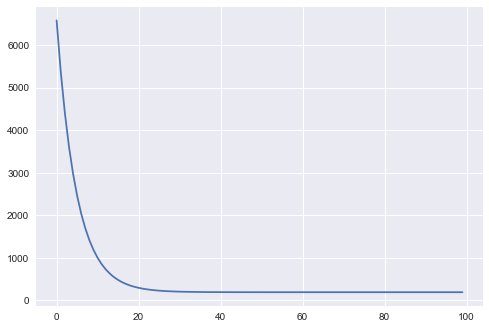

In [19]:
plt.plot(all_error)

In [20]:
x_points=[]
y_points=[]
for i in range(x.shape[0]):
    cur_y=final_theta[0]+final_theta[1]*x[i]
    y_points.append(cur_y)
    x_points.append(x[i])

In [21]:
x_points=np.array(x_points)

In [22]:
y_points=np.array(y_points)

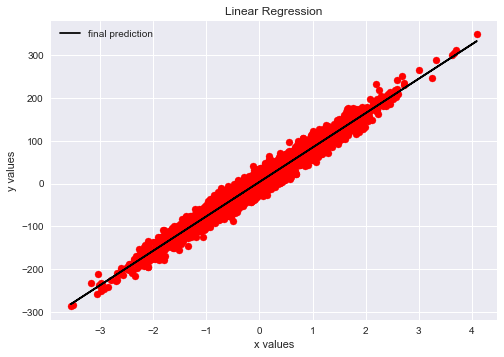

In [23]:
plt.scatter(x,y,color="red")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title("Linear Regression")

plt.plot(x_points,y_points,color="black",label="final prediction")
plt.legend()
plt.show()

# Step 4 : Testing Data

In [24]:
x_test=pd.read_csv("./Testing Data/Linear_X_test.csv").values

In [25]:
x_test.shape

(1250, 1)

In [26]:
y_test=hypothesis(x_test,final_theta)

In [27]:
y_test

array([[-147.52442937],
       [ -66.26572056],
       [-200.05625812],
       ...,
       [  14.03674552],
       [ -18.66651255],
       [ -51.07518652]])

In [28]:
y_test.shape

(1250, 1)

# Step 5 : Creating a csv file

In [29]:
# Creating dataframe - only one column
df = pd.DataFrame(data=y_test,columns=["y"])
# Save to a csv file
df.to_csv('./Testing Data/y_pred_test.csv',index=False)

In [30]:
y_test_load=pd.read_csv("./Testing Data/y_pred_test.csv").values

In [31]:
y_test

array([[-147.52442937],
       [ -66.26572056],
       [-200.05625812],
       ...,
       [  14.03674552],
       [ -18.66651255],
       [ -51.07518652]])

# Step 6 : Visualisation of testing dataset

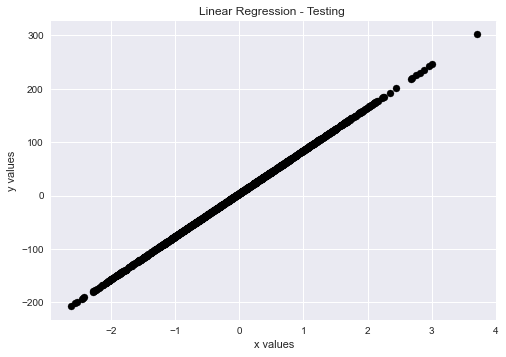

In [32]:
plt.scatter(x_test,y_test,color="black")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title("Linear Regression - Testing ")
plt.show()

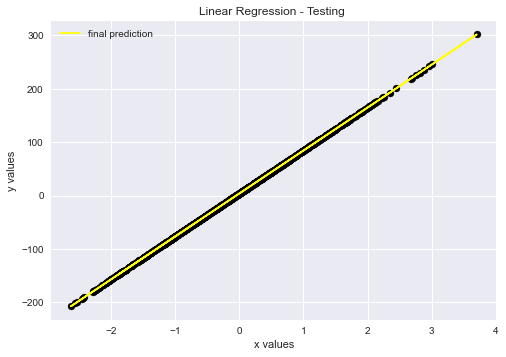

In [33]:
plt.scatter(x_test,y_test,color="black")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title("Linear Regression - Testing ")
x_points_test=[]
y_points_test=[]
for i in range(x_test.shape[0]):
    cur_y=final_theta[0]+final_theta[1]*x_test[i]
    y_points_test.append(cur_y)
    x_points_test.append(x_test[i])
plt.plot(x_points_test,y_points_test,color="yellow",label="final prediction")
plt.legend()
plt.show()

# Step 7 : Computing Accuracy

In [34]:
def R2_Score(y_org,y_pred):
    num = np.sum((y_org-y_pred)**2)
    denom = np.sum((y_org-y_org.mean())**2)
    score=1-(num/denom)
    return score*100

In [35]:
R2_Score(y,y_points)

97.0961222102746